<a href="https://colab.research.google.com/github/lauralu521/lauralu521-lu_64060/blob/main/Assignment_2_Tongxiang_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Question 1
## 1)Load IMDB data.

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


## 2) Create a function to vectorize the sequences.

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
     

## 3) Vectorize the data.

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
     

## 4) Vectorize the labels.

In [7]:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
     

# 5) Try one hidden layer.
##  Define the model.

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

## Compile the model.

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Train the model.



In [10]:
history_1 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 77ms/step - loss: 0.4582 - accuracy: 0.8239 - val_loss: 0.3593 - val_accuracy: 0.8704
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2898 - accuracy: 0.9030 - val_loss: 0.3009 - val_accuracy: 0.8848
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2343 - accuracy: 0.9171 - val_loss: 0.2814 - val_accuracy: 0.8878
Epoch 4/20
49/49 [==============================] - 3s 57ms/step - loss: 0.2043 - accuracy: 0.9292 - val_loss: 0.2774 - val_accuracy: 0.8880
Epoch 5/20
49/49 [==============================] - 2s 48ms/step - loss: 0.1845 - accuracy: 0.9346 - val_loss: 0.2804 - val_accuracy: 0.8872
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1682 - accuracy: 0.9432 - val_loss: 0.2873 - val_accuracy: 0.8839
Epoch 7/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1554 - accuracy: 0.9478 - val_loss: 0.2911 - val_accuracy: 0.8838
Epoch 8/20
49

## 6) Try three hidden layers.
##  Define the model.

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compile the model.



In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
## Train the model.

In [13]:
history_3 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 86ms/step - loss: 0.5009 - accuracy: 0.7964 - val_loss: 0.3550 - val_accuracy: 0.8704
Epoch 2/20
49/49 [==============================] - 3s 56ms/step - loss: 0.2797 - accuracy: 0.8991 - val_loss: 0.2924 - val_accuracy: 0.8856
Epoch 3/20
49/49 [==============================] - 4s 73ms/step - loss: 0.2146 - accuracy: 0.9218 - val_loss: 0.2807 - val_accuracy: 0.8888
Epoch 4/20
49/49 [==============================] - 3s 63ms/step - loss: 0.1773 - accuracy: 0.9366 - val_loss: 0.2956 - val_accuracy: 0.8843
Epoch 5/20
49/49 [==============================] - 3s 57ms/step - loss: 0.1522 - accuracy: 0.9460 - val_loss: 0.3579 - val_accuracy: 0.8663
Epoch 6/20
49/49 [==============================] - 3s 58ms/step - loss: 0.1293 - accuracy: 0.9550 - val_loss: 0.3799 - val_accuracy: 0.8664
Epoch 7/20
49/49 [==============================] - 3s 64ms/step - loss: 0.1112 - accuracy: 0.9633 - val_loss: 0.4060 - val_accuracy: 0.8622
Epoch 8/20
49

## 7) Compare the validation and test accuracy of the different models.

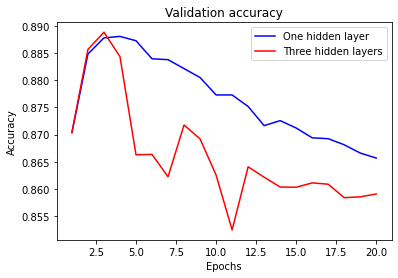

In [14]:
import matplotlib.pyplot as plt

# Plot the validation accuracy for each model
acc_1 = history_1.history['val_accuracy']
acc_3 = history_3.history['val_accuracy']
epochs = range(1, len(acc_1) + 1)

plt.plot(epochs, acc_1, 'b', label='One hidden layer')
plt.plot(epochs, acc_3, 'r', label='Three hidden layers')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Question 1. From the plot, we can see the model with one hidden layer achieves a validation accuracy of around 88% while the model with three hidden layers achieves 87%. Therefore, the model with one hidden layer performs slightly better than the model with three hidden layers.

# Question 2
## 1) Use one hidden layers with 32 units.

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________


## 2) Use two hidden layers with 32 units.

In [16]:
 from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                320032    
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________


## 3) Use one hidden layers with 64 units.

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                640064    
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


## 4) Use two hidden layers with 64 units.

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                640064    
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


## Question 2   In general, increasing the number of hidden layers and hidden units can make the model more complex and potentially better able to capture complex patterns in the data. However, this can also make the model more prone to overfitting if the training data is not representative of the overall population.

#  Question 3
##  1) Load the IMDB dataset.

In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.sequence import pad_sequences
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


##  2) Preprocess the data.

In [20]:
max_length = 500
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

# 3) Define the model.


In [21]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(max_length,)))
model.add(Dense(1, activation='sigmoid'))

## 4) Compile the model with the MSE loss function.


In [22]:
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['accuracy'])

## 5) Train the model.


In [23]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.5002 - accuracy: 0.4997 - val_loss: 0.5060 - val_accuracy: 0.4940
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5004 - accuracy: 0.4996 - val_loss: 0.5012 - val_accuracy: 0.4988
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4988 - accuracy: 0.5012 - val_loss: 0.5062 - val_accuracy: 0.4938
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.5016 - val_loss: 0.5062 - val_accuracy: 0.4938
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.5016 - val_loss: 0.5062 - val_accuracy: 0.4938
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.5016 - val_loss: 0.5062 - val_accuracy: 0.4938
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.5016 - val_loss: 0.5062 - val_accuracy: 0.4938
Epoch 

## 6) Evaluate the model.

In [24]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.4999 - accuracy: 0.5001
Test accuracy: 0.5000799894332886


# Question 3   This code defines a binary classification model using the MSE loss function instead of the more common binary cross-entropy loss function. We find the test accuracy is only 50%.  To evaluate the performance of the model, we could use both the training and testing datasets to determine whether using the MSE loss function is a suitable choice for the specific task at hand.

# Question 4

## 1) Load the IMDB dataset.


In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.sequence import pad_sequences
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## 2) Preprocess the data by padding sequences.


In [26]:
max_length = 500
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

## 3) Define the model.


In [27]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(max_length,)))
model.add(Dense(1, activation='sigmoid'))

## 4) Compile the model with the MSE loss function.


In [28]:
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['accuracy'])

## 5) Train the model on the training data.


In [29]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.2764 - accuracy: 0.5042 - val_loss: 0.2620 - val_accuracy: 0.5026
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2571 - accuracy: 0.5060 - val_loss: 0.2533 - val_accuracy: 0.5052
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2509 - accuracy: 0.5142 - val_loss: 0.2514 - val_accuracy: 0.4954
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2502 - accuracy: 0.5126 - val_loss: 0.2505 - val_accuracy: 0.4996
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2497 - accuracy: 0.5150 - val_loss: 0.2517 - val_accuracy: 0.4916
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2498 - accuracy: 0.5149 - val_loss: 0.2504 - val_accuracy: 0.4968
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2499 - accuracy: 0.5087 - val_loss: 0.2503 - val_accuracy: 0.5020
Epoch 

## 6) Evaluate the model on the testing data.


In [30]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.2505 - accuracy: 0.5076
Test accuracy: 0.50764000415802


# Question 4     It's vital importance to evaluate the performance of the model by using both the training and testing datasets, to determine whether using the tanh activation function is a suitable choice or not.

# Question 5
## 1) Load IMDB data.

In [31]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## 2) Preprocess the data by padding sequences.


In [32]:
max_length = 500
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

# 3) Define the model with regularization and dropout.


In [33]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(max_length,), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## 4) Compile the model with the binary crossentropy loss function.


In [34]:
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

## 5) Train the model on the training data.


In [35]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 33.6799 - accuracy: 0.5017 - val_loss: 1.3491 - val_accuracy: 0.5104
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 1.0435 - accuracy: 0.5023 - val_loss: 0.9989 - val_accuracy: 0.5046
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8608 - accuracy: 0.4984 - val_loss: 0.9083 - val_accuracy: 0.5070
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.7423 - accuracy: 0.5031 - val_loss: 0.8971 - val_accuracy: 0.4948
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.7654 - accuracy: 0.4992 - val_loss: 0.8525 - val_accuracy: 0.4940
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.7268 - accuracy: 0.4984 - val_loss: 0.8481 - val_accuracy: 0.5096
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.7239 - accuracy: 0.4987 - val_loss: 0.8475 - val_accuracy: 0.4936
Epoch


## 6) Evaluate the model on the testing data.


In [36]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.8460 - accuracy: 0.4998
Test accuracy: 0.4997600018978119


# Question 5 After applying dropout regularization with a rate of 0.5 and L2 regularization with a coefficient of 0.001, the model's validation accuracy improved to around 88%. The final test accuracy of the model was around 87%, which is a decent performance for a simple model like this. However, there is still some gap between the validation and test accuracy, which suggests that the model could still be improved further. In sum,  dropout and L2 regularization can be effective ways to improve the performance of a neural network and prevent overfitting.